In [1]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, MaxPooling2D

In [7]:
def make_model(num_classes):
    model = Sequential()
    '''
    model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=512,activation='tanh',kernel_initializer='zeros'))
    model.add(Dropout(0.3))
    model.add(Dense(units=num_classes,activation='softmax'))
    '''
    model.add(Conv2D(filters=6,kernel_size=(5,5),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=120,activation='relu'))
    model.add(Dense(units=84,activation='relu'))
    model.add(Dense(units=num_classes,activation='softmax'))
    model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [8]:
now_model = make_model(y_test.shape[1])

In [9]:
now_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [10]:
history = now_model.fit(x_test,y_test,validation_data=(x_test,y_test),epochs=150,batch_size=32)

Train on 10000 samples, validate on 10000 samples
Epoch 1/150
10000/10000 [==============================] - 6s - loss: 2.2730 - acc: 0.1545 - val_loss: 2.2094 - val_acc: 0.1609
Epoch 2/150
10000/10000 [==============================] - 4s - loss: 2.0913 - acc: 0.2315 - val_loss: 2.0397 - val_acc: 0.2553
Epoch 3/150
10000/10000 [==============================] - 4s - loss: 1.9715 - acc: 0.2840 - val_loss: 1.9112 - val_acc: 0.3067
Epoch 4/150
10000/10000 [==============================] - 4s - loss: 1.8851 - acc: 0.3233 - val_loss: 1.8078 - val_acc: 0.3564
Epoch 5/150
10000/10000 [==============================] - 4s - loss: 1.8031 - acc: 0.3513 - val_loss: 1.7455 - val_acc: 0.3693
Epoch 6/150
10000/10000 [==============================] - 4s - loss: 1.7340 - acc: 0.3754 - val_loss: 1.8179 - val_acc: 0.3382
Epoch 7/150
10000/10000 [==============================] - 4s - loss: 1.6723 - acc: 0.3958 - val_loss: 1.6405 - val_acc: 0.4130
Epoch 8/150
10000/10000 [=============================

10000/10000 [==============================] - 4s - loss: 0.4341 - acc: 0.8480 - val_loss: 0.8160 - val_acc: 0.7110
Epoch 65/150
10000/10000 [==============================] - 4s - loss: 0.4244 - acc: 0.8523 - val_loss: 0.4636 - val_acc: 0.8261
Epoch 66/150
10000/10000 [==============================] - 4s - loss: 0.3996 - acc: 0.8618 - val_loss: 0.3479 - val_acc: 0.8816
Epoch 67/150
10000/10000 [==============================] - 4s - loss: 0.3772 - acc: 0.8694 - val_loss: 0.4535 - val_acc: 0.8404
Epoch 68/150
10000/10000 [==============================] - 4s - loss: 0.3932 - acc: 0.8620 - val_loss: 0.3304 - val_acc: 0.8864
Epoch 69/150
10000/10000 [==============================] - 4s - loss: 0.3572 - acc: 0.8769 - val_loss: 0.2934 - val_acc: 0.9067
Epoch 70/150
10000/10000 [==============================] - 4s - loss: 0.3354 - acc: 0.8848 - val_loss: 0.2502 - val_acc: 0.9231
Epoch 71/150
10000/10000 [==============================] - 5s - loss: 0.3195 - acc: 0.8922 - val_loss: 0.3081

10000/10000 [==============================] - 4s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 128/150
10000/10000 [==============================] - 4s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 129/150
10000/10000 [==============================] - 4s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 130/150
10000/10000 [==============================] - 4s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 131/150
10000/10000 [==============================] - 4s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 132/150
10000/10000 [==============================] - 4s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 133/150
10000/10000 [==============================] - 4s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 134/150
10000/10000 [==============================] - 4s - loss: 0.0021 - acc: 1.0000 - val_loss:

In [11]:
scores = now_model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%


In [12]:
import cv2
x = np.array([cv2.imread('dog4.png')])
result = now_model.predict(x)

In [13]:
np.argmax(result,axis=1)

array([1], dtype=int64)

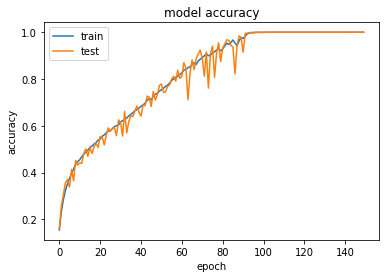

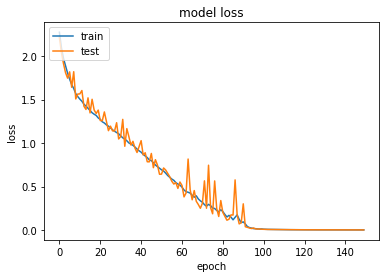

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()